In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/a.xlsx')
data

,name,age,מין,e1,q1e1,q2e1,q3e1,q4e1,q5e1,q6e1,...,q5e2,q6e2,object_2,Verbal_2,visual_2,physical_2,focused_2,eye_contact_2,smile_2,curiosity_2
0,Student 1,27,m,vvsd,63,6.00,3.00,28.5,21,44.25,...,14.00,20.00,yes,4,4,2,4,4,5,5
1,Student 2,40,m,vvsd,3,6.75,14.25,3.0,24,1.50,...,31.00,6.00,yes,5,5,4,5,5,4,4
2,Student 3,30,m,vvsd,21,15.00,5.25,12.0,36,12.00,...,6.00,16.00,no,3,1,1,5,5,1,4
3,Student 4,32,f,vsd,2,2.00,2.00,9.0,5,3.00,...,2.25,2.25,no,1,1,1,5,5,5,5


In [ ]:
import pandas as pd

# Assuming `data` is your DataFrame

# Calculate the Bridging_1 and Bridging_2 columns
data['Bridging_1'] = data['Verbal_1'] * 3 + data['visual_1'] * 2 + data['physical_1'] * 4
data['Bridging_2'] = data['Verbal_2'] * 3 + data['visual_2'] * 2 + data['physical_2'] * 4

# Display the first few rows to verify
print(data.head())


        name  age מין    e1  q1e1   q2e1   q3e1  q4e1  q5e1   q6e1  ...  \
0  Student 1   27   m  vvsd    63   6.00   3.00  28.5    21  44.25  ...   
1  Student 2   40   m  vvsd     3   6.75  14.25   3.0    24   1.50  ...   
2  Student 3   30   m  vvsd    21  15.00   5.25  12.0    36  12.00  ...   
3  Student 4   32   f   vsd     2   2.00   2.00   9.0     5   3.00  ...   

  object_2  Verbal_2  visual_2  physical_2  focused_2  eye_contact_2  smile_2  \
0      yes         4         4           2          4              4        5   
1      yes         5         5           4          5              5        4   
2       no         3         1           1          5              5        1   
3       no         1         1           1          5              5        5   

   curiosity_2 Bridging_1  Bridging_2  
0            5         32          28  
1            4         28          41  
2            4         21          15  
3            5         15           9  

[4 rows x 35 colu

### For each participant, the time it takes to complete each of the six questions in two different experiments is compared

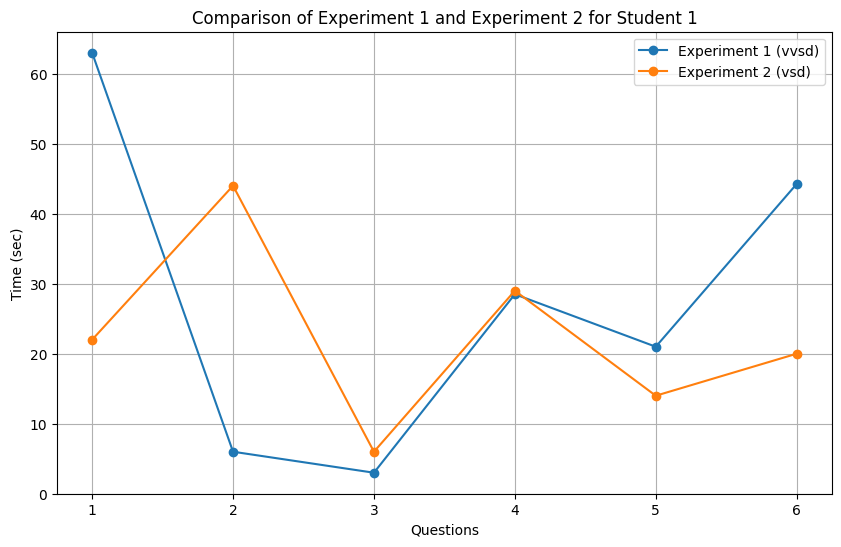

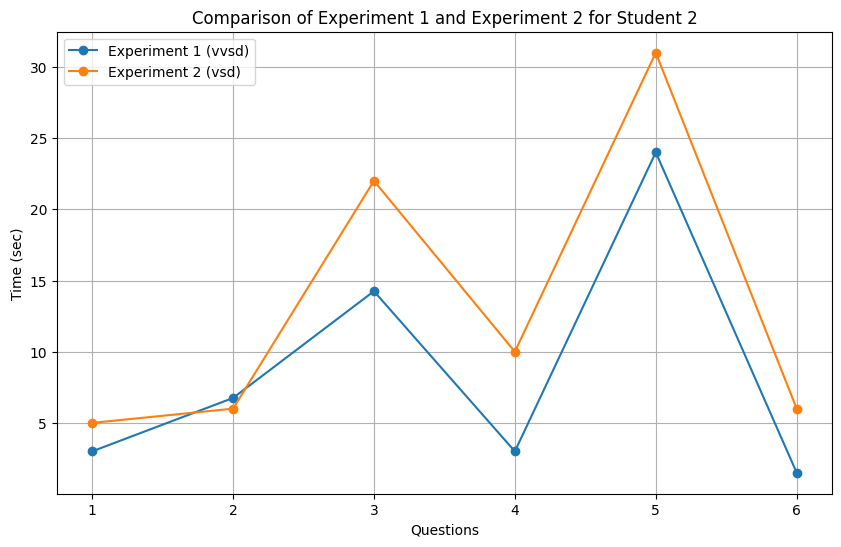

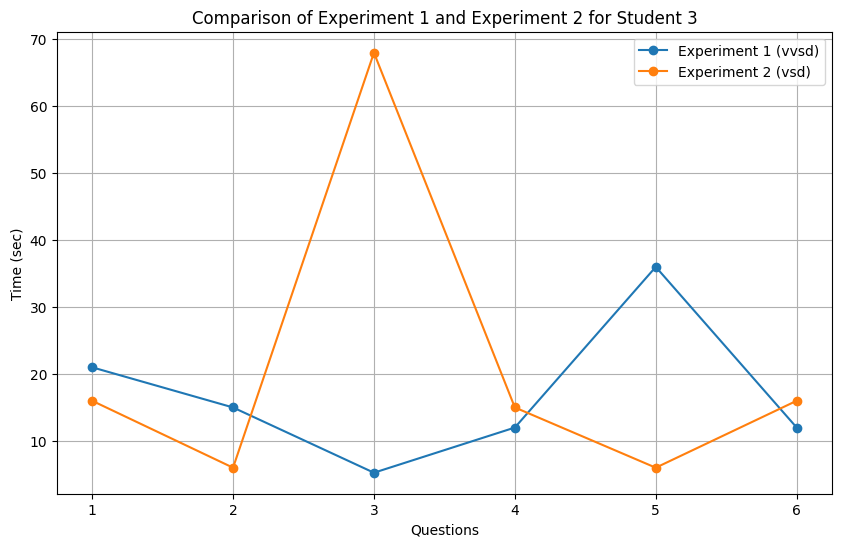

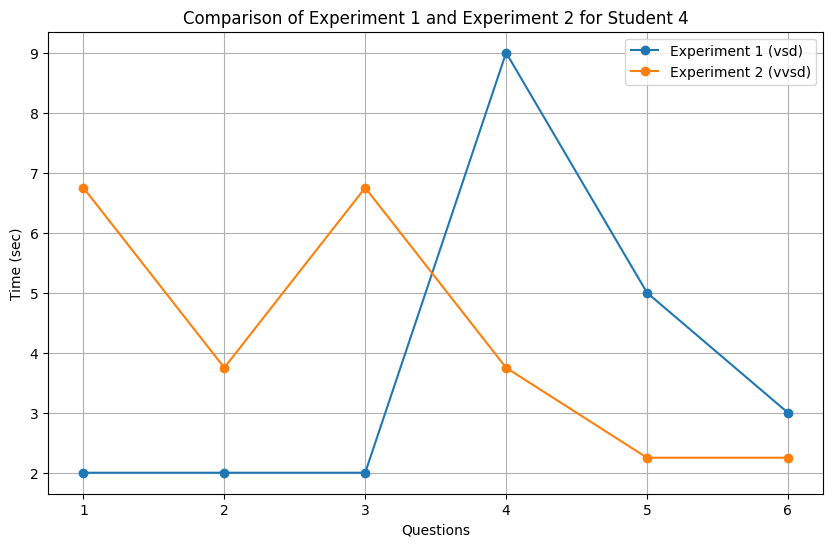

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

    # Check if the subset is empty
    if subset.empty:
        print(f"No data available for {name}")
        continue

    # Get the experiment types
    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(['1', '2', '3', '4', '5', '6'], subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].values.flatten(), marker='o', label=f'Experiment 1 ({exp_type_e1})')
    plt.plot(['1', '2', '3', '4', '5', '6'], subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].values.flatten(), marker='o', label=f'Experiment 2 ({exp_type_e2})')

    # Add labels and title
    plt.title(f'Comparison of Experiment 1 and Experiment 2 for {name}')
    plt.xlabel('Questions')
    plt.ylabel('Time (sec)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


### : For each participant, the average time it takes to complete the questions in two different experiments is compared

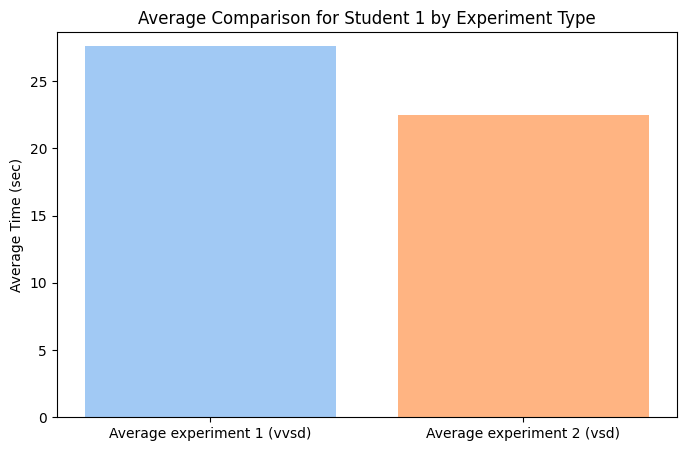

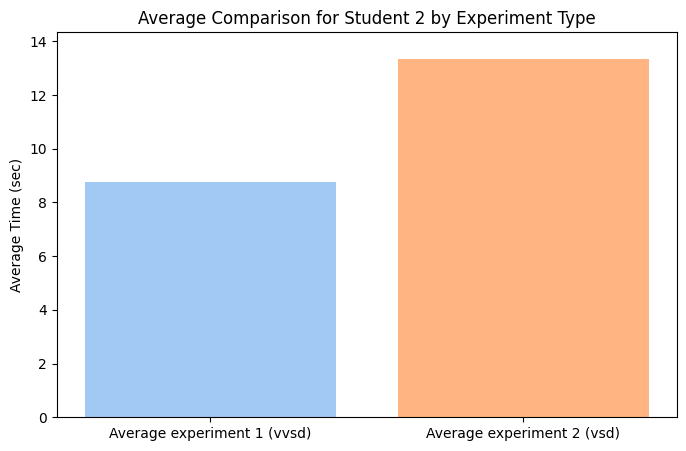

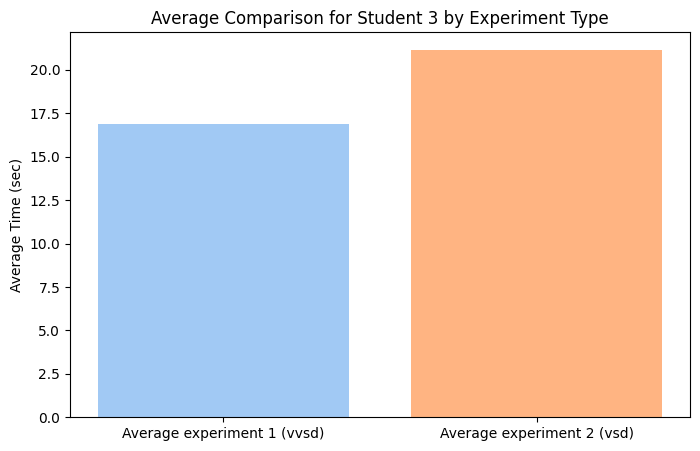

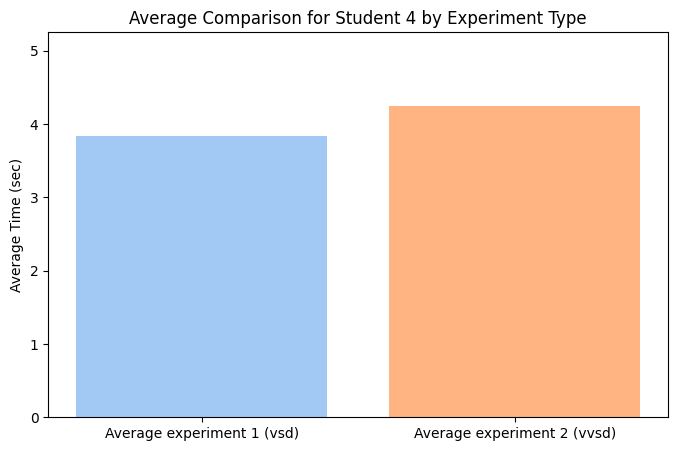

In [ ]:
# Define pastel colors
colors = sns.color_palette("pastel")

for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

    # Check if the subset is not empty
    if not subset.empty:
        # Calculate the averages
        avg_e1 = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values[0]
        avg_e2 = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values[0]

        # Get the experiment types
        exp_type_e1 = subset['e1'].values[0]
        exp_type_e2 = subset['e2'].values[0]

        # Create a bar chart to compare the averages with experiment types
        plt.figure(figsize=(8, 5))
        plt.bar([f'Average experiment 1 ({exp_type_e1})', f'Average experiment 2 ({exp_type_e2})'], [avg_e1, avg_e2], color=colors[:2])

        # Add labels and title
        plt.title(f'Average Comparison for {name} by Experiment Type')
        plt.ylabel('Average Time (sec)')
        plt.ylim(0, max(avg_e1, avg_e2) + 1)  # Adjust y-limit for better visibility

        # Show the plot
        plt.show()
    else:
        print(f"Skipping {name}: no data available.")

### Compares the average time it takes each participant to complete six questions in the two experiments



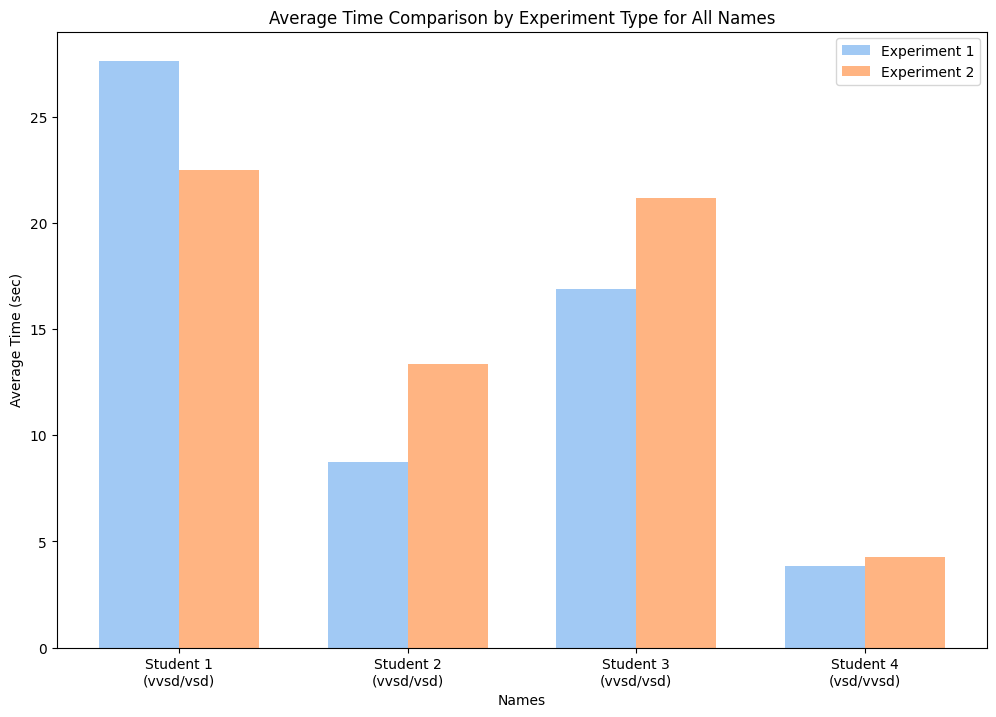

In [ ]:

# Define pastel colors using Seaborn
colors = sns.color_palette("pastel")

# Prepare to collect data for all names
names = []
avg_e1_list = []
avg_e2_list = []
exp_type_e1_list = []
exp_type_e2_list = []

# Loop through each unique name and calculate averages
for name in data['name'].unique():
    subset = data[data['name'] == name]

    if subset.empty:
        print(f"Warning: No data available for {name}. Skipping.")
        continue

    avg_e1 = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values
    avg_e2 = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values

    if avg_e1.size == 0 or avg_e2.size == 0:
        print(f"Warning: Missing data for {name}. Skipping.")
        continue

    avg_e1 = avg_e1[0]
    avg_e2 = avg_e2[0]

    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]

    names.append(name)
    avg_e1_list.append(avg_e1)
    avg_e2_list.append(avg_e2)
    exp_type_e1_list.append(exp_type_e1)
    exp_type_e2_list.append(exp_type_e2)

# Create a bar chart for all names
x = np.arange(len(names))  # the label locations

plt.figure(figsize=(12, 8))

# Width of the bars
width = 0.35

# Plot the data using pastel colors
plt.bar(x - width/2, avg_e1_list, width, label='Experiment 1', color=colors[0])
plt.bar(x + width/2, avg_e2_list, width, label='Experiment 2', color=colors[1])

# Add labels and title
plt.xlabel('Names')
plt.ylabel('Average Time (sec)')
plt.title('Average Time Comparison by Experiment Type for All Names')
plt.xticks(x, [f'{name}\n({e1}/{e2})' for name, e1, e2 in zip(names, exp_type_e1_list, exp_type_e2_list)])
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Correct column names with proper capitalization
for name in data['name'].unique():
    subset = data[data['name'] == name]
    print(f"Data for {name}:")
    print(subset[['e1', 'e2', 'Verbal_1', 'visual_1', 'physical_1', 'Verbal_2', 'visual_2', 'physical_2']])


Data for Student 1:
     e1   e2  Verbal_1  visual_1  physical_1  Verbal_2  visual_2  physical_2
0  vvsd  vsd         4         4           3         4         4           2
Data for Student 2:
     e1   e2  Verbal_1  visual_1  physical_1  Verbal_2  visual_2  physical_2
1  vvsd  vsd         4         4           2         5         5           4
Data for Student 3:
     e1   e2  Verbal_1  visual_1  physical_1  Verbal_2  visual_2  physical_2
2  vvsd  vsd         3         4           1         3         1           1
Data for Student 4:
    e1    e2  Verbal_1  visual_1  physical_1  Verbal_2  visual_2  physical_2
3  vsd  vvsd         3         1           1         1         1           1


###  compares the average time it takes each participant to complete six questions in two different types of experiments VVSD to VSD-


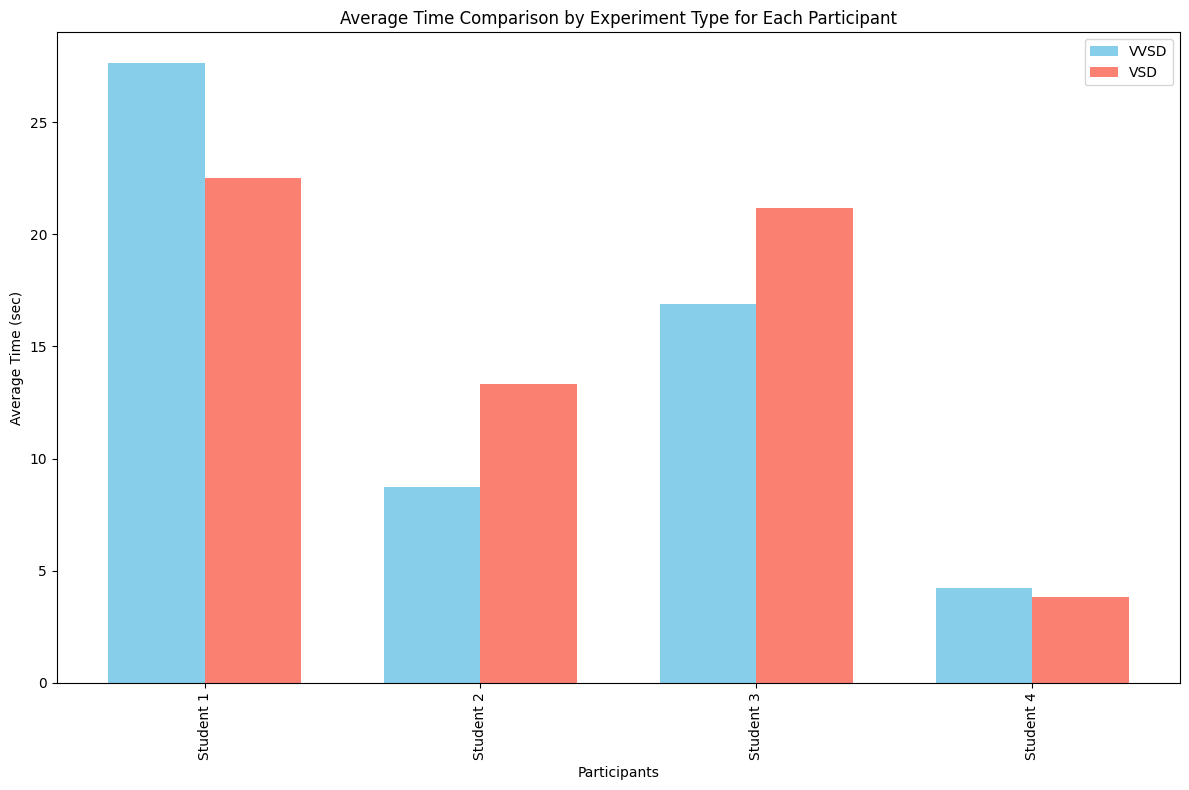

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Remove rows with missing names or missing experiment types
cleaned_data = data.dropna(subset=['name', 'e1', 'e2'])

# Initialize lists to store names and average times
names = []
avg_vvsd = []
avg_vsd = []

# Loop through each unique name
for name in cleaned_data['name'].unique():
    subset = cleaned_data[cleaned_data['name'] == name]

    # Get the experiment types
    exp_type_e1 = subset['e1'].values[0] if len(subset['e1'].values) > 0 else None
    exp_type_e2 = subset['e2'].values[0] if len(subset['e2'].values) > 0 else None

    # Initialize average times
    avg_time_vvsd = np.nan
    avg_time_vsd = np.nan

    # Calculate average times based on the experiment types
    if exp_type_e1 == 'vvsd':
        avg_time_vvsd = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values[0]
    elif exp_type_e1 == 'vsd':
        avg_time_vsd = subset[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].mean(axis=1).values[0]

    if exp_type_e2 == 'vvsd':
        avg_time_vvsd = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values[0]
    elif exp_type_e2 == 'vsd':
        avg_time_vsd = subset[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].mean(axis=1).values[0]

    # Append the data
    names.append(name)
    avg_vvsd.append(avg_time_vvsd)
    avg_vsd.append(avg_time_vsd)

# Convert lists to numpy arrays
avg_vvsd = np.array(avg_vvsd)
avg_vsd = np.array(avg_vsd)

# Check if there's any data to plot
if not len(names) or not np.any(np.isfinite(avg_vvsd)) or not np.any(np.isfinite(avg_vsd)):
    print("No valid data to plot.")
else:
    # Plotting
    x = np.arange(len(names))  # the label locations

    plt.figure(figsize=(12, 8))

    # Plot the data
    plt.bar(x - 0.175, avg_vvsd, width=0.35, label='VVSD', color='skyblue', align='center')
    plt.bar(x + 0.175, avg_vsd, width=0.35, label='VSD', color='salmon', align='center')

    # Add labels and title
    plt.xlabel('Participants')
    plt.ylabel('Average Time (sec)')
    plt.title('Average Time Comparison by Experiment Type for Each Participant')
    plt.xticks(x, names, rotation=90)  # Adjust x-ticks to align with bars
    plt.legend()

    # Ensure everything fits within the plot
    plt.tight_layout()
    plt.show()


### Compares the level of mediation and the type of mediation received by each participant, for each experiment


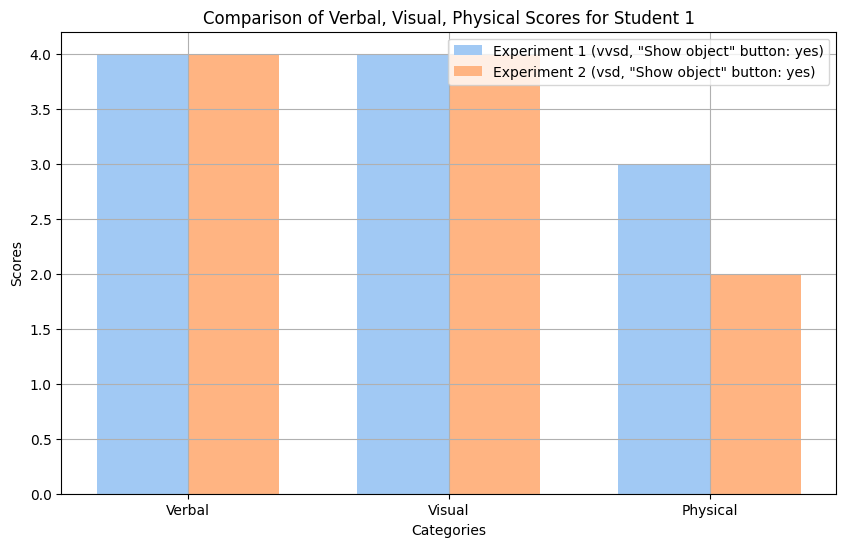

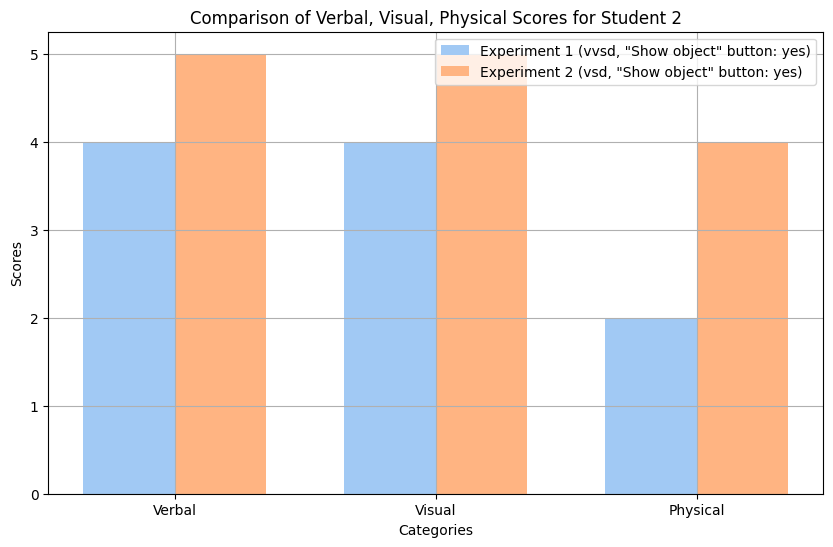

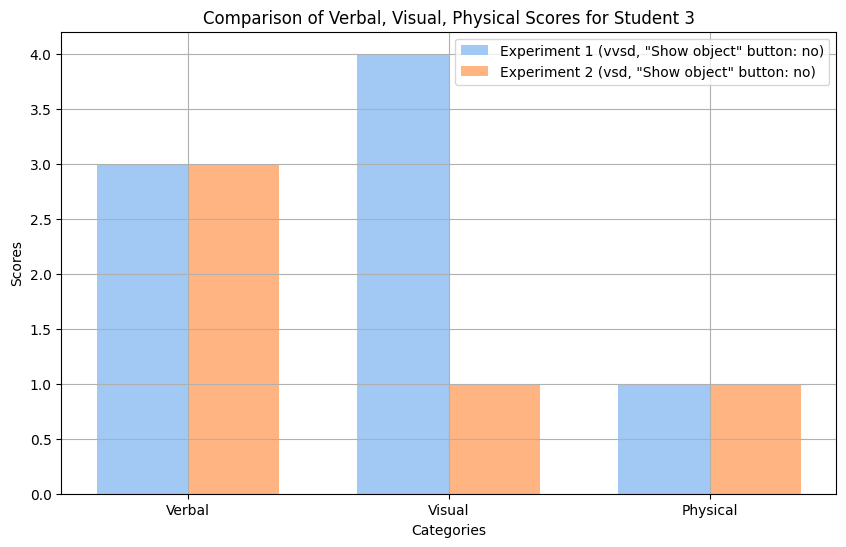

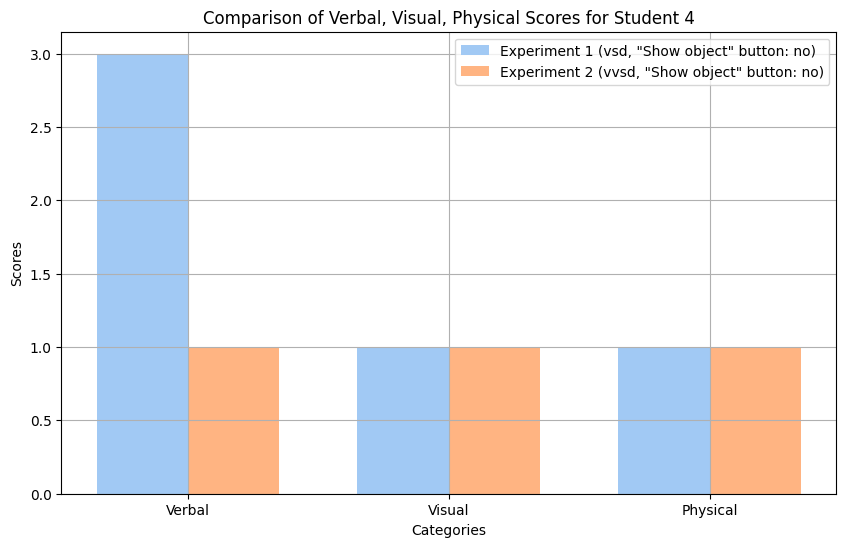

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define pastel colors
colors = sns.color_palette("pastel")

for name in data['name'].unique():
    # Filter the data for this name
    subset = data[data['name'] == name]

    # Check if the subset is empty
    if subset.empty:
        print(f"No data available for {name}")
        continue

    # Get the experiment types and button usage
    exp_type_e1 = subset['e1'].values[0]
    exp_type_e2 = subset['e2'].values[0]
    button_used_e1 = subset['object_1'].values[0]
    button_used_e2 = subset['object_2'].values[0]

    # Extract the Verbal, Visual, Physical data for both experiments
    e1_scores = subset[['Verbal_1', 'visual_1', 'physical_1']].values.flatten()
    e2_scores = subset[['Verbal_2', 'visual_2', 'physical_2']].values.flatten()

    # Create a bar chart
    categories = ['Verbal', 'Visual', 'Physical']
    x = np.arange(len(categories))  # the label locations

    plt.figure(figsize=(10, 6))

    # Width of the bars
    width = 0.35

    # Plot the data with pastel colors
    plt.bar(x - width/2, e1_scores, width, label=f'Experiment 1 ({exp_type_e1}, "Show object" button: {button_used_e1})', color=colors[0])
    plt.bar(x + width/2, e2_scores, width, label=f'Experiment 2 ({exp_type_e2}, "Show object" button: {button_used_e2})', color=colors[1])

    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Scores')
    plt.title(f'Comparison of Verbal, Visual, Physical Scores for {name}')
    plt.xticks(x, categories)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


### Two histograms: one for experiment 1, and another for experiment 2, where both histograms are placed on the same plot for comparison of reaction times.

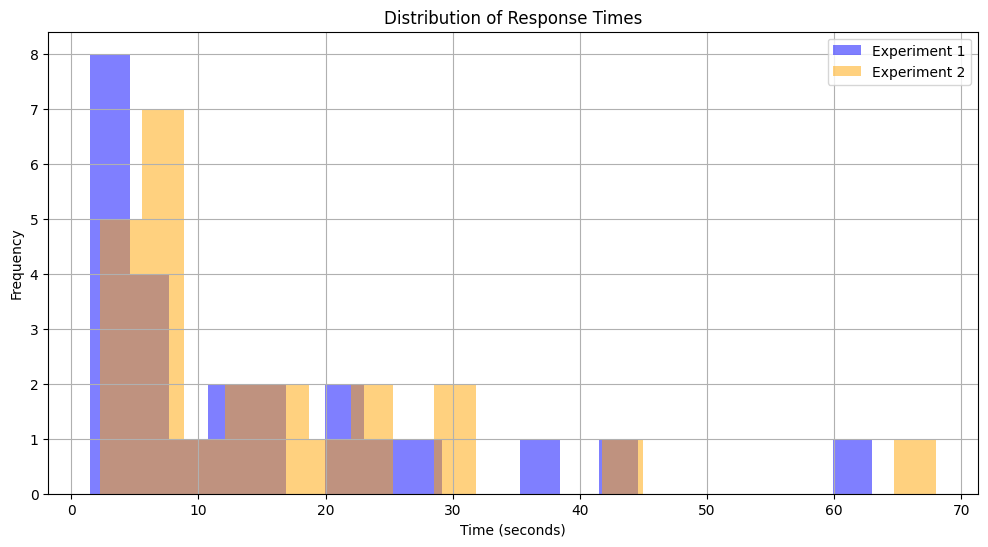

In [ ]:

# Flatten data for histograms
e1_times = data[['q1e1', 'q2e1', 'q3e1', 'q4e1', 'q5e1', 'q6e1']].values.flatten()
e2_times = data[['q1e2', 'q2e2', 'q3e2', 'q4e2', 'q5e2', 'q6e2']].values.flatten()

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(e1_times, bins=20, alpha=0.5, label='Experiment 1', color='blue')
plt.hist(e2_times, bins=20, alpha=0.5, label='Experiment 2', color='orange')
plt.title('Distribution of Response Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Display for each participant a graph that compares the metrics for each trial: Focused, eye_contact, smile, curiosity

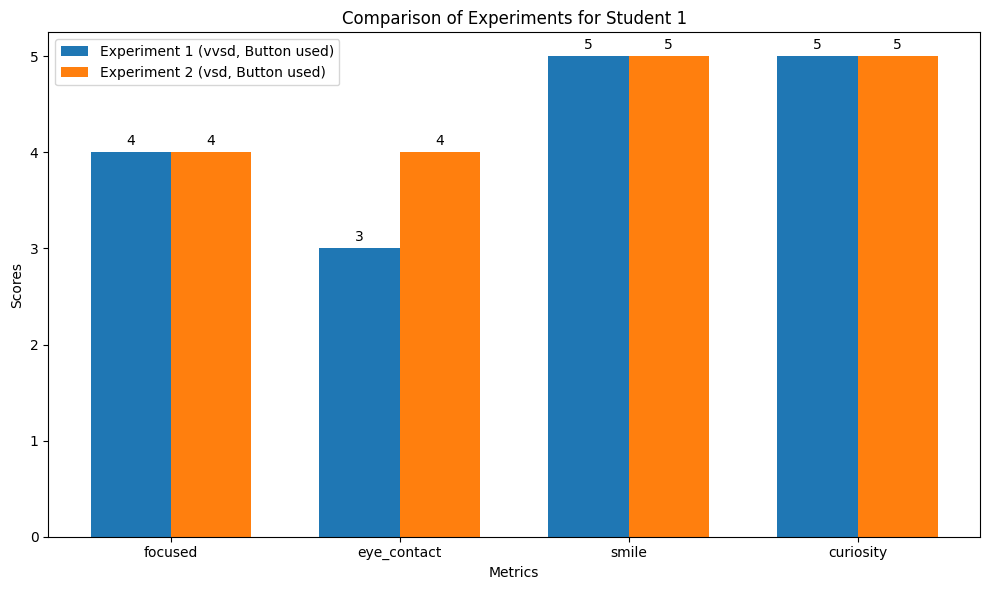

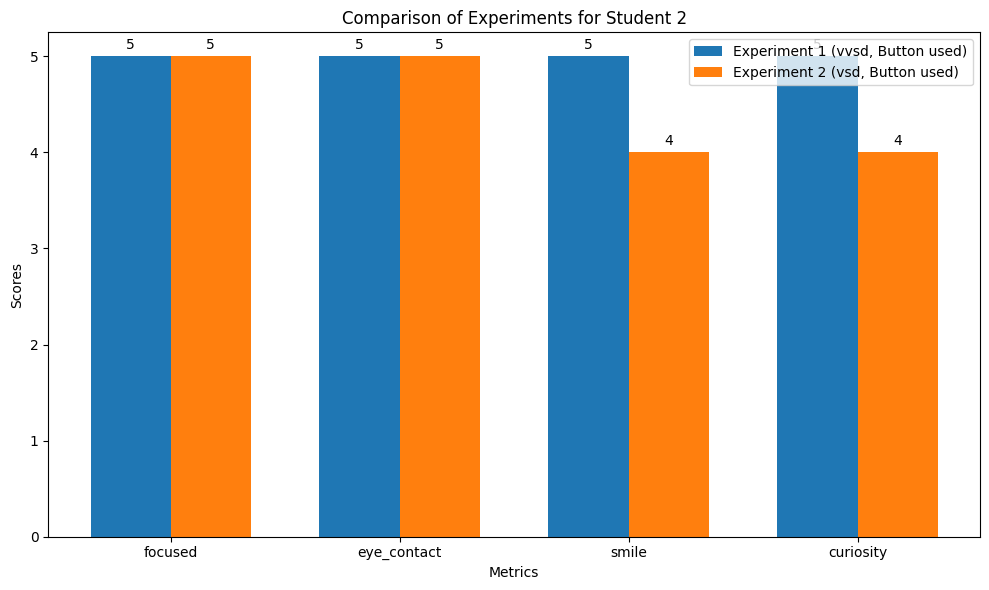

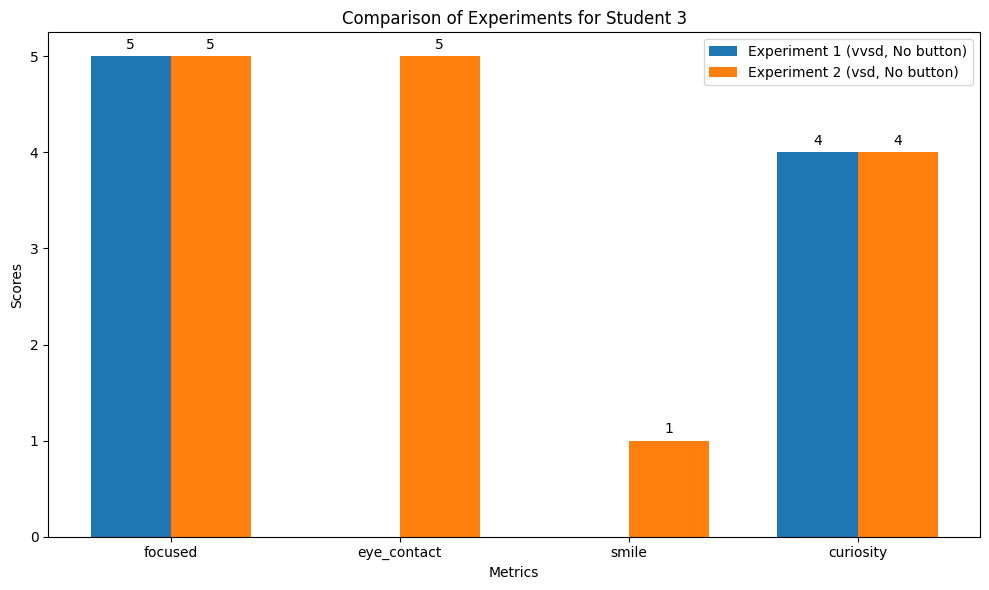

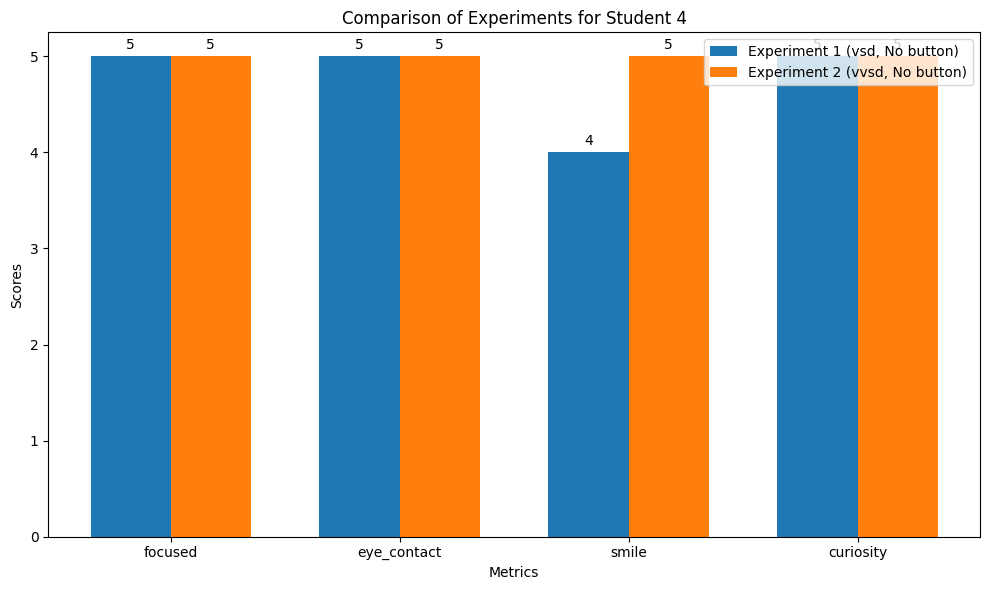

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics you want to compare
metrics = [ 'focused', 'eye_contact', 'smile', 'curiosity']

# Iterate through each participant
for name in data['name'].unique():
    subset = data[data['name'] == name].iloc[0]  # Get data for the current participant

    # Extract the experiment types and button usage
    exp_type_e1 = subset['e1']
    exp_type_e2 = subset['e2']
    button_used_e1 = subset['object_1']
    button_used_e2 = subset['object_2']

    # Extract the data for Experiment 1 and Experiment 2
    exp1_values = [subset[f'{metric}_1'] for metric in metrics]
    exp2_values = [subset[f'{metric}_2'] for metric in metrics]

    # Set up the plot
    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, exp1_values, width, label=f'Experiment 1 ({exp_type_e1}, {"Button used" if button_used_e1 == "yes" else "No button"})')
    bars2 = ax.bar(x + width/2, exp2_values, width, label=f'Experiment 2 ({exp_type_e2}, {"Button used" if button_used_e2 == "yes" else "No button"})')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(f'Comparison of Experiments for {name}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Attach a text label above each bar, displaying its height.
    for bars in [bars1, bars2]:
        ax.bar_label(bars, padding=3)

    # Show the plot
    plt.tight_layout()
    plt.show()


### Show in one graph for each participant comparing the measures for each trial: Focused, eye_contact, smile, curiosity

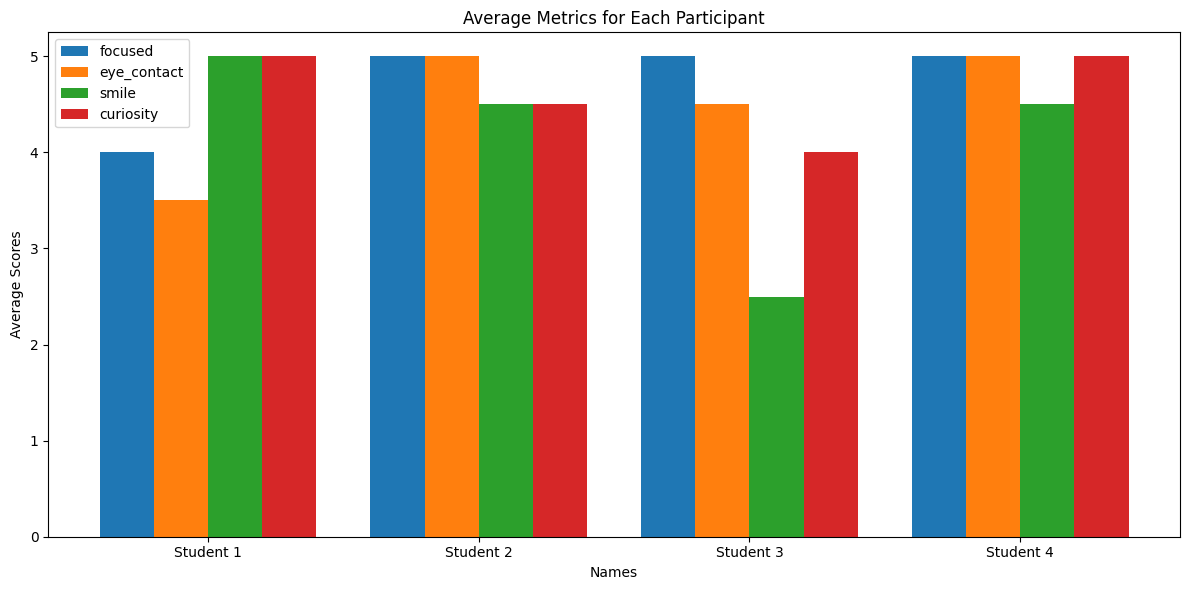

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics you want to compare
metrics = ['focused', 'eye_contact', 'smile', 'curiosity']

# Initialize a dictionary to store average values for each metric
avg_values = {metric: [] for metric in metrics}

# Store names for the X-axis
names = []

# Iterate through each participant
for name in data['name'].unique():
    names.append(name)

    # Calculate the average for each metric across both experiments
    for metric in metrics:
        avg_metric_value = (data[data['name'] == name][f'{metric}_1'].mean() +
                            data[data['name'] == name][f'{metric}_2'].mean()) / 2
        avg_values[metric].append(avg_metric_value)

# Set up the plot
x = np.arange(len(names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, avg_values[metric], width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Names')
ax.set_ylabel('Average Scores')
ax.set_title('Average Metrics for Each Participant')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


###Show in one graph for each participant the indicators of the first experiment: Focused, eye_contact, smile, curiosity

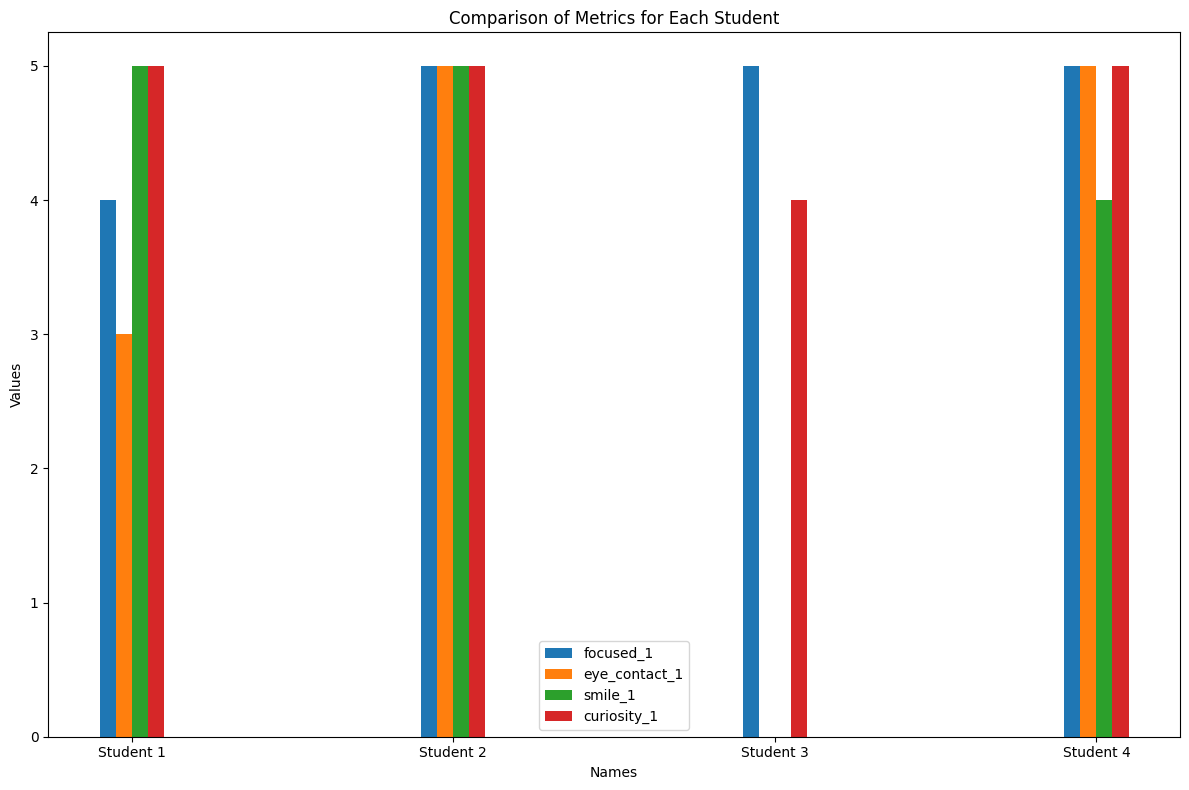

In [ ]:
# Metrics of interest
metrics = ['focused_1', 'eye_contact_1', 'smile_1', 'curiosity_1']

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
width = 0.2

# Positions for the bars
x = np.arange(len(data['name']))
bar_width = width / len(metrics)

# Plotting data
for i, metric in enumerate(metrics):
    values = data[metric].values
    bar_positions = x + i * bar_width - (len(metrics) - 1) * bar_width / 2

    # Create bars
    bars = ax.bar(bar_positions, values, bar_width, label=metric)

# Labeling the plot
ax.set_xlabel('Names')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics for Each Student')
ax.set_xticks(x)
ax.set_xticklabels(data['name'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Show in one graph for each participant the indicators of the second experiment: Focused, eye_contact, smile, curiosity

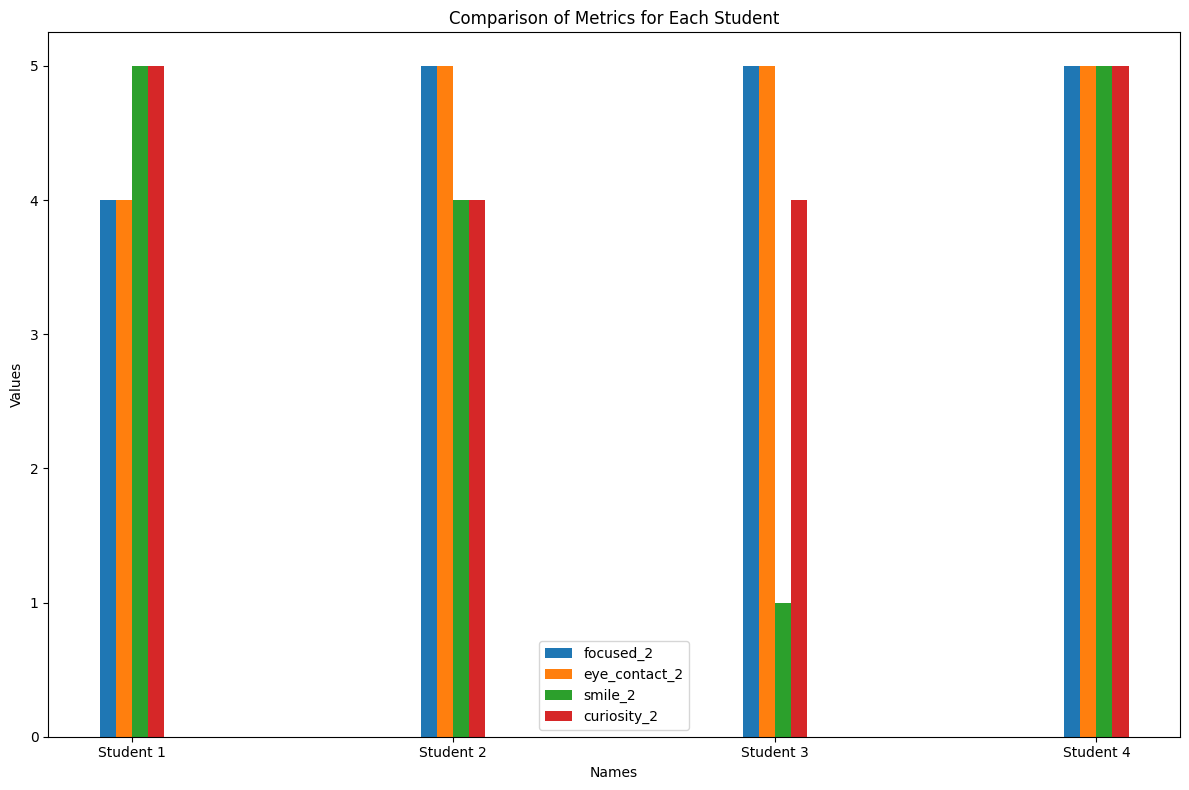

In [19]:
# Metrics of interest
metrics = ['focused_2', 'eye_contact_2', 'smile_2', 'curiosity_2']

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
width = 0.2

# Positions for the bars
x = np.arange(len(data['name']))
bar_width = width / len(metrics)

# Plotting data
for i, metric in enumerate(metrics):
    values = data[metric].values
    bar_positions = x + i * bar_width - (len(metrics) - 1) * bar_width / 2

    # Create bars
    bars = ax.bar(bar_positions, values, bar_width, label=metric)

# Labeling the plot
ax.set_xlabel('Names')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics for Each Student')
ax.set_xticks(x)
ax.set_xticklabels(data['name'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()